# Sales Analysis Project


#### As a data scientist, you must perform the following steps on the enclosed data:
#### 1. Data wrangling
#### 2. Data analysis
#### 3. Data visualization
#### 4. Report generation

In [162]:
# Header File import

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [163]:
# Read the data file in python Dataframe
df = pd.read_csv('AusApparalSales4thQrt2020.csv') 

In [164]:
# Display Dataframe to perform further operations
df

,Date,Time,State,Group,Unit,Sales
0,1-Oct-2020,Morning,WA,Kids,8,20000
1,1-Oct-2020,Morning,WA,Men,8,20000
2,1-Oct-2020,Morning,WA,Women,4,10000
3,1-Oct-2020,Morning,WA,Seniors,15,37500
4,1-Oct-2020,Afternoon,WA,Kids,3,7500
...,...,...,...,...,...,...
7555,30-Dec-2020,Afternoon,TAS,Seniors,14,35000
7556,30-Dec-2020,Evening,TAS,Kids,15,37500
7557,30-Dec-2020,Evening,TAS,Men,15,37500
7558,30-Dec-2020,Evening,TAS,Women,11,27500


#### Question 1.a. Data wrangling
#### a. Ensure that the data is clean and free from any missing or incorrect entries.
####     ○ Inspect the data manually to identify missing or incorrect information using the functions isna() and notna().

In [165]:
df.isna().sum()

Date     0
Time     0
State    0
Group    0
Unit     0
Sales    0
dtype: int64

In [166]:
df.notna().sum()

Date     7560
Time     7560
State    7560
Group    7560
Unit     7560
Sales    7560
dtype: int64

In [167]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7560 entries, 0 to 7559
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    7560 non-null   object
 1   Time    7560 non-null   object
 2   State   7560 non-null   object
 3   Group   7560 non-null   object
 4   Unit    7560 non-null   int64 
 5   Sales   7560 non-null   int64 
dtypes: int64(2), object(4)
memory usage: 354.5+ KB


#### Question 1.b. Based on your knowledge of data analytics, include your recommendations for treating missing and incorrect data (dropping the null values or filling them).
#### Ensuring that data does not contain missing or incorrect information using the functions isna() and notna()

In [168]:
df['Date'].unique()

array(['1-Oct-2020', '2-Oct-2020', '3-Oct-2020', '4-Oct-2020',
       '5-Oct-2020', '6-Oct-2020', '7-Oct-2020', '8-Oct-2020',
       '9-Oct-2020', '10-Oct-2020', '11-Oct-2020', '12-Oct-2020',
       '13-Oct-2020', '14-Oct-2020', '15-Oct-2020', '16-Oct-2020',
       '17-Oct-2020', '18-Oct-2020', '19-Oct-2020', '20-Oct-2020',
       '21-Oct-2020', '22-Oct-2020', '23-Oct-2020', '24-Oct-2020',
       '25-Oct-2020', '26-Oct-2020', '27-Oct-2020', '28-Oct-2020',
       '29-Oct-2020', '30-Oct-2020', '1-Nov-2020', '2-Nov-2020',
       '3-Nov-2020', '4-Nov-2020', '5-Nov-2020', '6-Nov-2020',
       '7-Nov-2020', '8-Nov-2020', '9-Nov-2020', '10-Nov-2020',
       '11-Nov-2020', '12-Nov-2020', '13-Nov-2020', '14-Nov-2020',
       '15-Nov-2020', '16-Nov-2020', '17-Nov-2020', '18-Nov-2020',
       '19-Nov-2020', '20-Nov-2020', '21-Nov-2020', '22-Nov-2020',
       '23-Nov-2020', '24-Nov-2020', '25-Nov-2020', '26-Nov-2020',
       '27-Nov-2020', '28-Nov-2020', '29-Nov-2020', '30-Nov-2020',
       '1-Dec

#### Here we can see that 2 dates are missing:
#### 31-Oct-2020 & 31-Dec-2020
#### Ideally we should ask this missing data from customer for accurate reports

#### Question 1.c. Choose a suitable data wrangling technique—either data standardization or normalization. Execute the preferred normalization method and present the resulting data. (Normalization is the preferred approach for this problem.)

In [169]:
# copy the data 
df_min_max_scaled = df.copy() 

# Get numeric column names
numeric_columns = df.select_dtypes(include=["number"]).columns.tolist()

In [170]:
for column in numeric_columns:
    min_val = df[column].min()
    max_val = df[column].max()
    df[column + '_norm'] = (df[column] - min_val) / (max_val - min_val)

In [171]:
df

,Date,Time,State,Group,Unit,Sales,Unit_norm,Sales_norm
0,1-Oct-2020,Morning,WA,Kids,8,20000,0.095238,0.095238
1,1-Oct-2020,Morning,WA,Men,8,20000,0.095238,0.095238
2,1-Oct-2020,Morning,WA,Women,4,10000,0.031746,0.031746
3,1-Oct-2020,Morning,WA,Seniors,15,37500,0.206349,0.206349
4,1-Oct-2020,Afternoon,WA,Kids,3,7500,0.015873,0.015873
...,...,...,...,...,...,...,...,...
7555,30-Dec-2020,Afternoon,TAS,Seniors,14,35000,0.190476,0.190476
7556,30-Dec-2020,Evening,TAS,Kids,15,37500,0.206349,0.206349
7557,30-Dec-2020,Evening,TAS,Men,15,37500,0.206349,0.206349
7558,30-Dec-2020,Evening,TAS,Women,11,27500,0.142857,0.142857


In [172]:
# 1.b. Based on your knowledge of data analytics, include your recommendations for treating missing and incorrect data (dropping the null values or filling them).
# Remove any leading & traiing space in dataframe

for i in ['Time', 'State', 'Group']:
    df[i] = df[i].str.strip()

In [173]:
# 1.b. Based on your knowledge of data analytics, include your recommendations for treating missing and incorrect data (dropping the null values or filling them).
# Remove any leading & traiing space in dataframe
df['Time'] = df['Time'].str.strip()
df['State'] = df['State'].str.strip()
df['Group'] = df['Group'].str.strip()

In [174]:
df['Date_f'] = pd.to_datetime(df['Date'], format='%d-%b-%Y')
# Extract the month and year for grouping
df['Month'] = df['Date_f'].dt.to_period('M')  # Extract Month-Year as a Period object
# Group by Month and calculate total Sales
df_month = df.groupby(['Month']).mean(numeric_only = True)
print(df_month)



              Unit         Sales  Unit_norm  Sales_norm
Month                                                  
2020-10  18.141270  45353.174603   0.256211    0.256211
2020-11  14.394048  35985.119048   0.196731    0.196731
2020-12  21.480952  53702.380952   0.309221    0.309221


#### This shows December have highest sales, followed by October & then November

In [175]:
groups_df = df.groupby(['Group', 'Time', 'State']).agg({"Unit": "sum", "Sales": "sum"}).reset_index()

In [176]:
groups_df[groups_df['Group'] == 'Kids']

,Group,Time,State,Unit,Sales
0,Kids,Afternoon,NSW,2475,6187500
1,Kids,Afternoon,NT,752,1880000
2,Kids,Afternoon,QLD,1144,2860000
3,Kids,Afternoon,SA,1988,4970000
4,Kids,Afternoon,TAS,749,1872500
5,Kids,Afternoon,VIC,3515,8787500
6,Kids,Afternoon,WA,778,1945000
7,Kids,Evening,NSW,2453,6132500
8,Kids,Evening,NT,789,1972500
9,Kids,Evening,QLD,1086,2715000


#### 1.d: Share your insights regarding the application of the GroupBy() function for either data chunking or merging, and offer a recommendation based on your analysis.


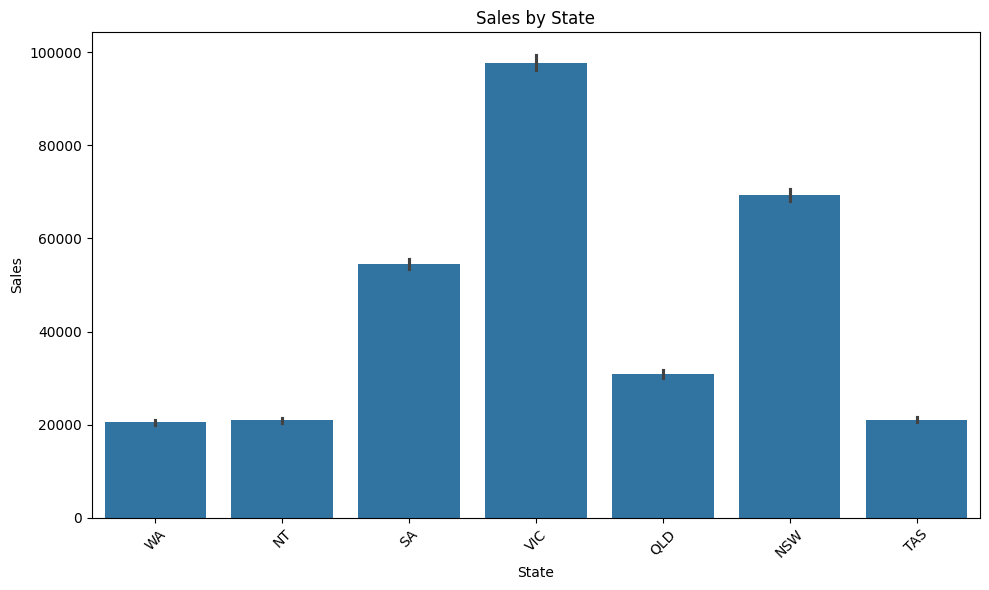

In [177]:

# Sales by State
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='State', y='Sales')
plt.title('Sales by State')
plt.xlabel('State')
plt.ylabel('Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



#### THis shows that VIC state has good sales as compared to WA, NT and TAS state. 
#### SUggestive measures: 
####
#### > We can start promotional offers 
#### > We can Run targeted promotions, focus on inventory alignment, and adjust product offerings based on sales patterns
#### > We can increase Marketing and Advertisment efforts in states with lower sales
#### > We can have additional member only discounts & sending regular email promotions et al.

## Question 2

#### Question 2.a. Perform descriptive statistical analysis on the data in the Sales and Unit columns. Utilize techniques such as mean, median, mode, and standard deviation for this analysis.

In [178]:
df.describe()

,Unit,Sales,Unit_norm,Sales_norm,Date_f
count,7560.000000,7560.000000,7560.000000,7560.000000,7560
mean,18.005423,45013.558201,0.254054,0.254054,2020-11-15 04:00:00.000000256
min,2.000000,5000.000000,0.000000,0.000000,2020-10-01 00:00:00
25%,8.000000,20000.000000,0.095238,0.095238,2020-10-23 00:00:00
50%,14.000000,35000.000000,0.190476,0.190476,2020-11-15 12:00:00
75%,26.000000,65000.000000,0.380952,0.380952,2020-12-08 00:00:00
max,65.000000,162500.000000,1.000000,1.000000,2020-12-30 00:00:00
std,12.901403,32253.506944,0.204784,0.204784,NaN


In [179]:
df['Unit'].mode()

0    9
Name: Unit, dtype: int64

In [180]:
df['Sales'].mode()

0    22500
Name: Sales, dtype: int64

#### 2.a : Perform descriptive statistical analysis on the data in the Sales and Unit columns. Utilize techniques such as mean, median, mode, and standard deviation for this analysis.


In [181]:

analysis_df = df.groupby(['Time', 'State', 'Group']).agg({'Sales' : ['mean','median','std'] ,
      'Unit' : ['mean','median','std']})
analysis_df


Sales                              Unit  \
                                 mean   median           std       mean   
Time      State Group                                                     
Afternoon NSW   Kids     68750.000000  67500.0  20619.785687  27.500000   
                Men      72361.111111  73750.0  18896.380335  28.944444   
                Seniors  66500.000000  65000.0  21413.531373  26.600000   
                Women    71388.888889  75000.0  20557.917332  28.555556   
          NT    Kids     20888.888889  20000.0   8989.000075   8.355556   
...                               ...      ...           ...        ...   
Morning   VIC   Women    97750.000000  93750.0  23329.136193  39.100000   
          WA    Kids     20472.222222  20000.0   9338.322971   8.188889   
                Men      22305.555556  22500.0   9378.344181   8.922222   
                Seniors  21666.666667  20000.0   9642.485576   8.666667   
                Women    19638.888889  17500.0   9252.703151   7.855556   

                                          
                        median       std  
Time      State Group                     
Afternoon NSW   Kids      27.0  8.247914  
                Men       29.5  7.558552  
                Seniors   26.0  8.565413  
                Women     30.0  8.223167  
          NT    Kids       8.0  3.595600  
...                        ...       ...  
Morning   VIC   Women     37.5  9.331654  
          WA    Kids       8.0  3.735329  
                Men        9.0  3.751338  
                Seniors    8.0  3.856994  
                Women      7.0  3.701081  

[84 rows x 6 columns]


#### Sales: Will provide an understanding of the average sales amount, the spread of sales values (through standard deviation).
#### Unit: Will give insights into how many units are typically sold (mean), how consistent the number of units sold is (standard deviation).

In [182]:
# Unit: The most common sales figure (mode)
# Group by 'Time', 'State', 'Group' and calculate the mode for each group
mode_unit = df.groupby(['Time', 'State', 'Group'])['Unit'].apply(lambda x: x.mode().iloc[0])
mode_unit

Time       State  Group  
Afternoon  NSW    Kids       17
                  Men        25
                  Seniors    17
                  Women      33
           NT     Kids        5
                             ..
Morning    VIC    Women      37
           WA     Kids        6
                  Men         6
                  Seniors     9
                  Women       6
Name: Unit, Length: 84, dtype: int64

In [183]:
# Sales: Which unit count is most frequent (mode)
# Group by 'Time', 'State', 'Group' and calculate the mode for each group
mode_sales = df.groupby(['Time', 'State', 'Group'])['Sales'].apply(lambda x: x.mode().iloc[0])
mode_sales

Time       State  Group  
Afternoon  NSW    Kids       42500
                  Men        62500
                  Seniors    42500
                  Women      82500
           NT     Kids       12500
                             ...  
Morning    VIC    Women      92500
           WA     Kids       15000
                  Men        15000
                  Seniors    22500
                  Women      15000
Name: Sales, Length: 84, dtype: int64

#### 2.b:  Identify the group with the highest sales and the group with the lowest sales based on the data provided


In [184]:

# Group by 'Group' and calculate the total sales for each group
group_sales = df.groupby('Group')['Sales'].sum()

# Find the group with the highest and lowest sales
highest_sales_group = group_sales.idxmax()
highest_sales_value = group_sales.max()

lowest_sales_group = group_sales.idxmin()
lowest_sales_value = group_sales.min()

In [185]:
# Display the result
print(f"Group with highest sales: {highest_sales_group} with Sales: {highest_sales_value}")
print(f"Group with lowest sales: {lowest_sales_group} with Sales: {lowest_sales_value}")

Group with highest sales: Men with Sales: 85750000
Group with lowest sales: Seniors with Sales: 84037500


In [186]:
# Group by 'State' and 'Group' and calculate the total sales for each group within each state
state_group_sales = df.groupby(['State', 'Group'])['Sales'].sum()

# For each state, find the group with the highest and lowest sales
highest_sales = state_group_sales.groupby('State').idxmax()
highest_sales_values = state_group_sales.groupby('State').max()

lowest_sales = state_group_sales.groupby('State').idxmin()
lowest_sales_values = state_group_sales.groupby('State').min()

# Combine results into a DataFrame
result = pd.DataFrame({
    'Highest_Sales_Group': highest_sales,
    'Highest_Sales_Value': highest_sales_values,
    'Lowest_Sales_Group': lowest_sales,
    'Lowest_Sales_Value': lowest_sales_values
})

# Display the result
print(result)

      Highest_Sales_Group  Highest_Sales_Value Lowest_Sales_Group  \
State                                                               
NSW          (NSW, Women)             19172500     (NSW, Seniors)   
NT              (NT, Men)              5762500      (NT, Seniors)   
QLD           (QLD, Kids)              8510000     (QLD, Seniors)   
SA            (SA, Women)             14970000         (SA, Kids)   
TAS           (TAS, Kids)              5775000       (TAS, Women)   
VIC          (VIC, Women)             26482500     (VIC, Seniors)   
WA              (WA, Men)              5752500        (WA, Women)   

       Lowest_Sales_Value  
State                      
NSW              18187500  
NT                5465000  
QLD               8190000  
SA               14515000  
TAS               5577500  
VIC              26315000  
WA                5262500  


### 2.d: Generate weekly, monthly, and quarterly reports to document and present the results of the analysis conducted.
### (Use suitable libraries such as NumPy, Pandas, and SciPy for performing the analysis.)

In [187]:
df['Date_re'] = pd.to_datetime(df['Date'], format='%d-%b-%Y')

# Set 'Time' as index for resampling
df.set_index('Date_re', inplace=True)


weekly_report = df.resample('W')['Sales'].sum()
monthly_report = df.resample('ME')['Sales'].sum()
quarterly_report = df.resample('QE')['Sales'].sum()

# Display the results for each time period
print("Weekly Report:")
print(weekly_report)

print("\nMonthly Report:")
print(monthly_report)

print("\nQuarterly Report:")
print(quarterly_report)

Weekly Report:
Date_re
2020-10-04    15045000
2020-10-11    27002500
2020-10-18    26640000
2020-10-25    26815000
2020-11-01    21807500
2020-11-08    20865000
2020-11-15    21172500
2020-11-22    21112500
2020-11-29    21477500
2020-12-06    29622500
2020-12-13    31525000
2020-12-20    31655000
2020-12-27    31770000
2021-01-03    13792500
Freq: W-SUN, Name: Sales, dtype: int64

Monthly Report:
Date_re
2020-10-31    114290000
2020-11-30     90682500
2020-12-31    135330000
Freq: ME, Name: Sales, dtype: int64

Quarterly Report:
Date_re
2020-12-31    340302500
Freq: QE-DEC, Name: Sales, dtype: int64


### Question 3

##### 3.a.1 Use suitable data visualization libraries to construct a dashboard for the head of sales and marketing. The dashboard should encompass key parameters: 
##### > State-wise sales analysis for different demographic groups (kids, women, men, and seniors).

In [188]:
# Group by 'State' and 'Group' and sum the 'Sales'
state_sales = df.groupby(['State', 'Group'])['Sales'].sum().reset_index()

# Pivot the data to make each 'Group' a separate column
pivot_df = state_sales.pivot_table(index='State', columns='Group', values='Sales', aggfunc='sum').reset_index()

In [189]:
pivot_df

Group,State,Kids,Men,Seniors,Women
0,NSW,18587500,19022500,18187500,19172500
1,NT,5700000,5762500,5465000,5652500
2,QLD,8510000,8392500,8190000,8325000
3,SA,14515000,14655000,14717500,14970000
4,TAS,5775000,5757500,5650000,5577500
5,VIC,26360000,26407500,26315000,26482500
6,WA,5625000,5752500,5512500,5262500


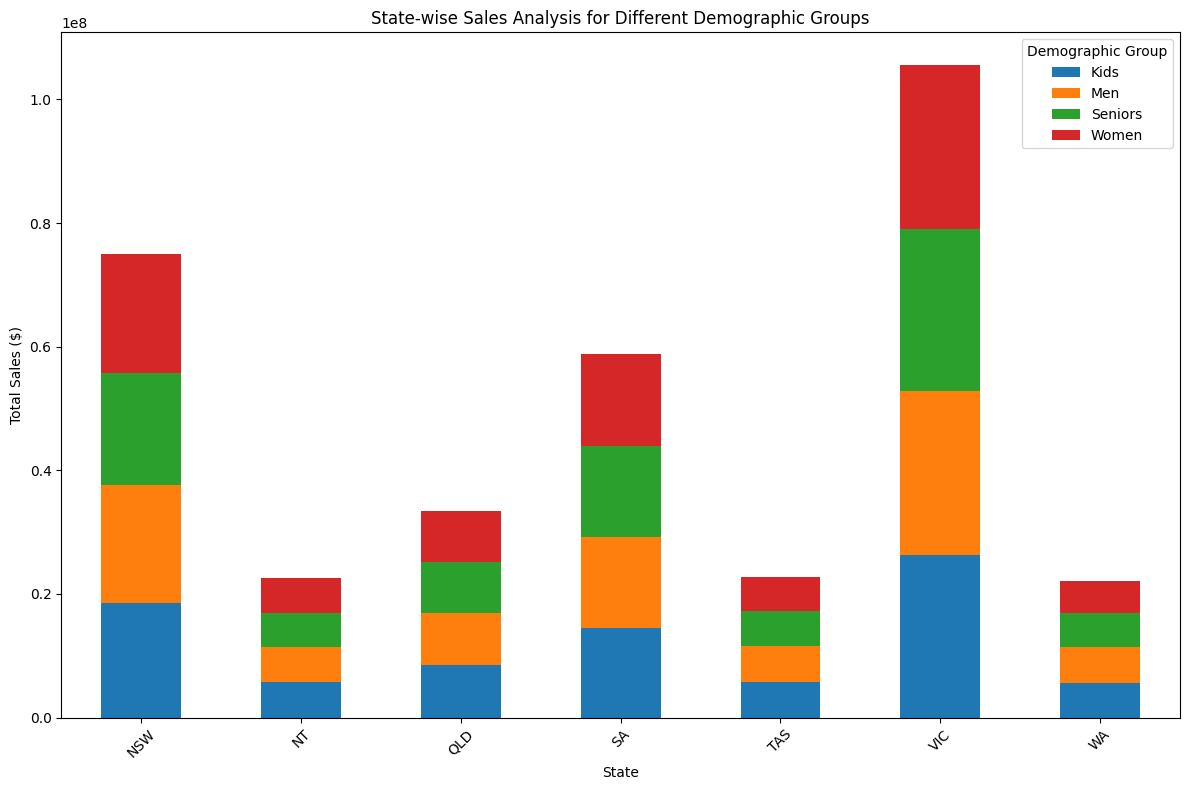

In [190]:
# Plotting the stacked bar chart
pivot_df.set_index('State').plot(kind='bar', stacked=True, figsize=(12, 8))

# Adding labels and title
plt.title('State-wise Sales Analysis for Different Demographic Groups')
plt.xlabel('State')
plt.ylabel('Total Sales ($)')
plt.legend(title='Demographic Group')
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()



#### 3.a.2 Group-wise sales analysis (Kids, Women, Men, and Seniors) across various states.

In [191]:

# Group by 'Group' and 'State', then sum the 'Sales'
group_sales = df.groupby(['Group', 'State'])['Sales'].sum().reset_index()

# Verify the grouped data
print(group_sales)



      Group State     Sales
0      Kids   NSW  18587500
1      Kids    NT   5700000
2      Kids   QLD   8510000
3      Kids    SA  14515000
4      Kids   TAS   5775000
5      Kids   VIC  26360000
6      Kids    WA   5625000
7       Men   NSW  19022500
8       Men    NT   5762500
9       Men   QLD   8392500
10      Men    SA  14655000
11      Men   TAS   5757500
12      Men   VIC  26407500
13      Men    WA   5752500
14  Seniors   NSW  18187500
15  Seniors    NT   5465000
16  Seniors   QLD   8190000
17  Seniors    SA  14717500
18  Seniors   TAS   5650000
19  Seniors   VIC  26315000
20  Seniors    WA   5512500
21    Women   NSW  19172500
22    Women    NT   5652500
23    Women   QLD   8325000
24    Women    SA  14970000
25    Women   TAS   5577500
26    Women   VIC  26482500
27    Women    WA   5262500


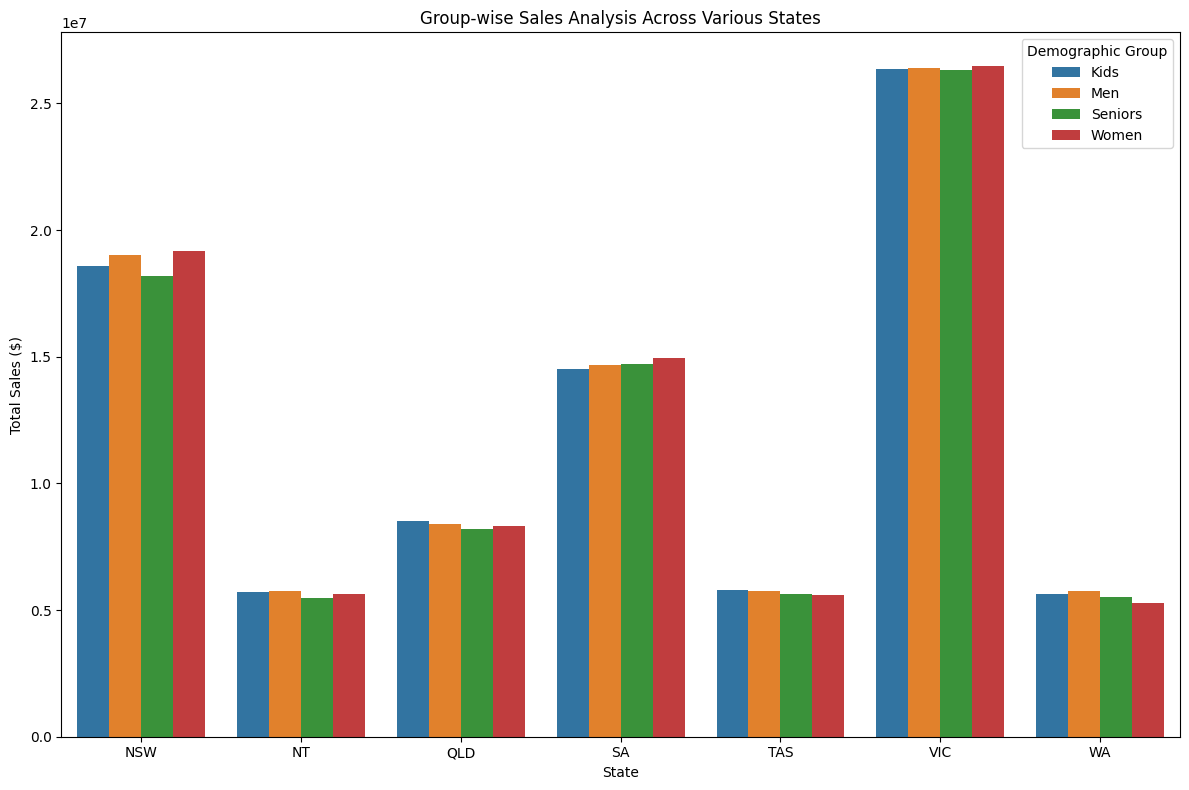

In [192]:
# Plotting the group-wise sales analysis across various states
plt.figure(figsize=(12, 8))
sns.barplot(x='State', y='Sales', hue='Group', data=group_sales)

# Adding labels and title
plt.title('Group-wise Sales Analysis Across Various States')
plt.xlabel('State')
plt.ylabel('Total Sales ($)')
plt.legend(title='Demographic Group')

# Show the plot
plt.tight_layout()
plt.show()

#### 3.1.c: Time-of-the-day analysis: Identify peak and off-peak sales periods to facilitate strategic planning for S&M teams. This information aids in designing programs like hyper-personalization and Next Best Offers to enhance sales.


In [193]:

# Group by 'Time' and sum the 'Sales'
time_sales = df.groupby(['Time'])['Sales'].sum().reset_index()

# Sort the data by Sales to identify peak and off-peak periods
time_sales_sorted = time_sales.sort_values(by='Sales', ascending=False)



In [194]:
time_sales_sorted

,Time,Sales
2,Morning,114207500
0,Afternoon,114007500
1,Evening,112087500


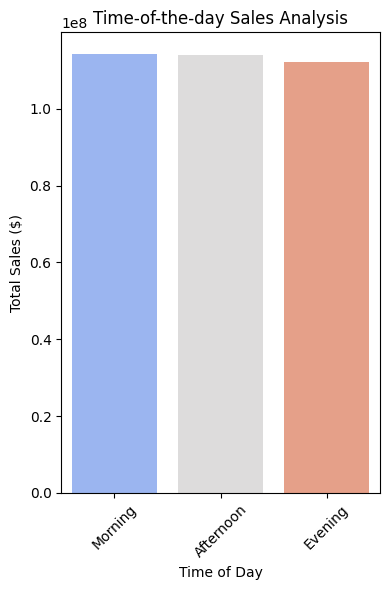

Peak Sales Period: Morning with Sales: $114207500
Off-Peak Sales Period: Evening with Sales: $112087500


In [195]:
# Plotting the Time-of-the-day Sales Analysis
plt.figure(figsize=(4, 6))

#sns.barplot(x='Time', y='Sales', hue='Group', data=time_sales_sorted)

sns.barplot(x='Time', y='Sales', data=time_sales_sorted, hue = 'Time', palette="coolwarm")

# Adding labels and title
plt.title('Time-of-the-day Sales Analysis')
plt.xlabel('Time of Day')
plt.ylabel('Total Sales ($)')
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()

# Display peak and off-peak times
peak_period = time_sales_sorted.iloc[0]
off_peak_period = time_sales_sorted.iloc[-1]

print(f"Peak Sales Period: {peak_period['Time']} with Sales: ${peak_period['Sales']}")
print(f"Off-Peak Sales Period: {off_peak_period['Time']} with Sales: ${off_peak_period['Sales']}")


#### 3.b. : Ensure the visualization is clear and accessible for effective decision-making by the head of sales and marketing (S&M). The dashboard must contain daily, weekly, monthly, and quarterly charts.

In [196]:
from matplotlib.dates import DateFormatter

In [197]:
# Convert 'Date' to datetime, specifying the correct format
df['Date'] = pd.to_datetime(df['Date'], format='%d-%b-%Y')

# Add derived columns
df['Week'] = df['Date'].dt.isocalendar().week.astype(int)  # Convert to int
df['Month'] = df['Date'].dt.month
df['Quarter'] = df['Date'].dt.quarter


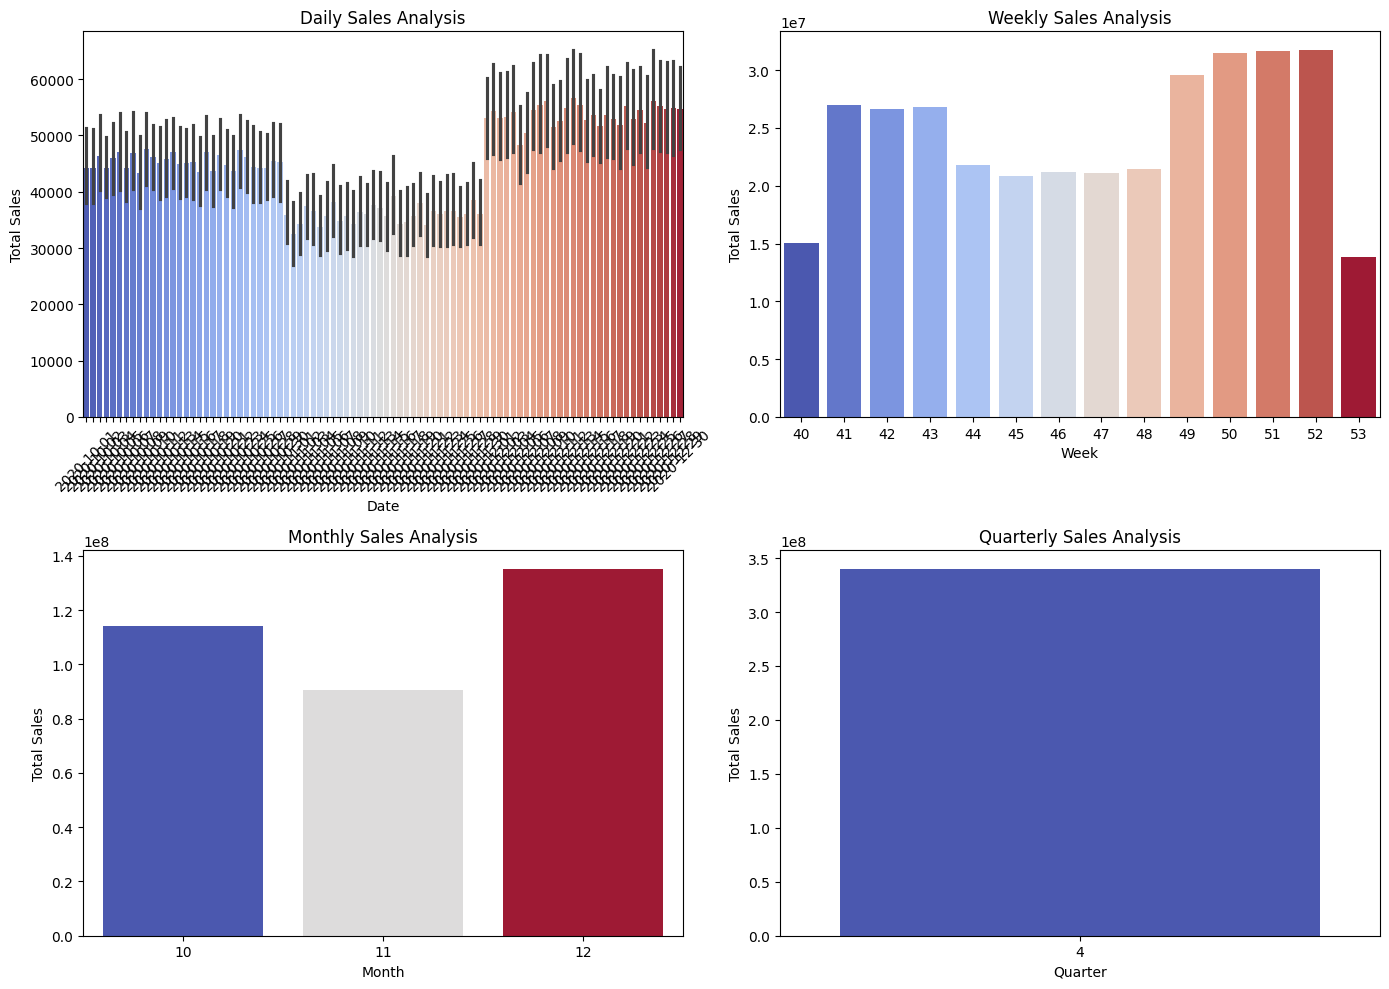

In [198]:
# Set up the figure for subplots
fig, axs = plt.subplots(2, 2, figsize=(14, 10))

# Daily Sales plot
sns.barplot(x='Date', y='Sales', data=df, ax=axs[0, 0], palette='coolwarm', hue='Date', legend=False)
axs[0, 0].set_title('Daily Sales Analysis')
axs[0, 0].set_xlabel('Date')
axs[0, 0].set_ylabel('Total Sales')
axs[0, 0].tick_params(axis='x', rotation=45)

# Weekly Sales plot
weekly_sales = df.groupby('Week')['Sales'].sum().reset_index()
sns.barplot(x='Week', y='Sales', data=weekly_sales, ax=axs[0, 1], palette='coolwarm', hue='Week', legend=False)
axs[0, 1].set_title('Weekly Sales Analysis')
axs[0, 1].set_xlabel('Week')
axs[0, 1].set_ylabel('Total Sales')

# Monthly Sales plot
monthly_sales = df.groupby('Month')['Sales'].sum().reset_index()
sns.barplot(x='Month', y='Sales', data=monthly_sales, ax=axs[1, 0], palette='coolwarm', hue='Month', legend=False)
axs[1, 0].set_title('Monthly Sales Analysis')
axs[1, 0].set_xlabel('Month')
axs[1, 0].set_ylabel('Total Sales')

# Quarterly Sales plot
quarterly_sales = df.groupby('Quarter')['Sales'].sum().reset_index()
sns.barplot(x='Quarter', y='Sales', data=quarterly_sales, ax=axs[1, 1], palette='coolwarm', hue='Quarter', legend=False)
axs[1, 1].set_title('Quarterly Sales Analysis')
axs[1, 1].set_xlabel('Quarter')
axs[1, 1].set_ylabel('Total Sales')

# Adjust layout
plt.tight_layout()
plt.show()


#### 3.c. : Include your recommendation and indicate why you are choosing the recommended visualization package.
#### I Prefer to use Seaborn as it provides good support & custmizations:

#### Seaborn provides a high-level interface to create attractive and informative statistical graphics. It integrates seamlessly with pandas DataFrames and handles categorical and continuous data in a simple manner.
#### Seaborn allows customization of colors, themes, and other plot settings, ensuring the visuals align with any branding or presentation needs.
#### We can built complex Plots which is easy to use

### Question 4: Report generation

<Axes: xlabel='Group', ylabel='Sales'>

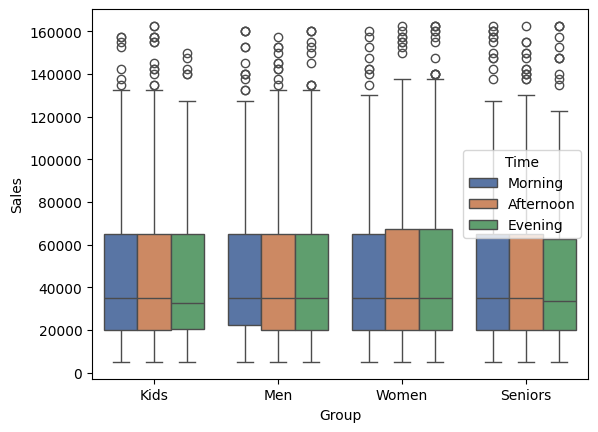

In [199]:
sns.boxplot(y = 'Sales', x = 'Group', data = df, palette = 'deep', hue = 'Time', dodge = 'True', legend = 'full')

#### Question 4.c.1: Use suitable graphs, plots, and analysis reports in the report, along with recommendations. Note that various aspects of analysis require different graphs and plots.
#### ○ Use a box plot for descriptive statistics.

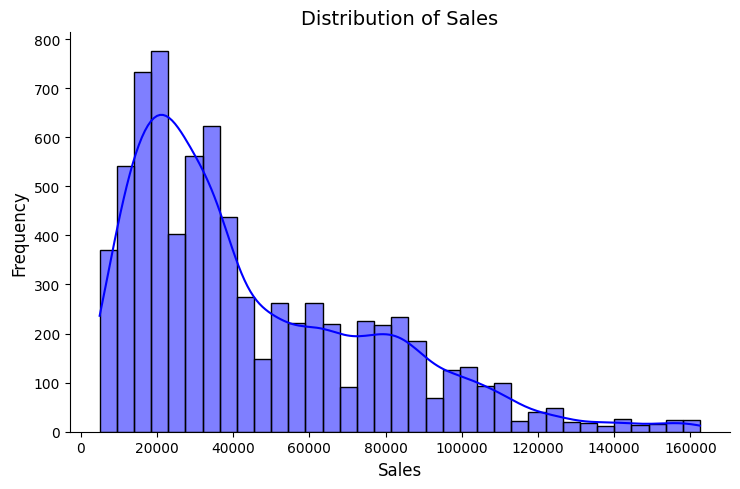

In [200]:
# Distribution plot for Sales
sns.displot(df['Sales'], kde=True, color='blue', height=5, aspect=1.5)

# Add labels and title
plt.title("Distribution of Sales", fontsize=14)
plt.xlabel("Sales", fontsize=12)
plt.ylabel("Frequency", fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()


#### Question 4.c.2: Use suitable graphs, plots, and analysis reports in the report, along with recommendations. Note that various aspects of analysis require different graphs and plots.
#### ○ Use the Seaborn distribution plot for any other statistical plotting.

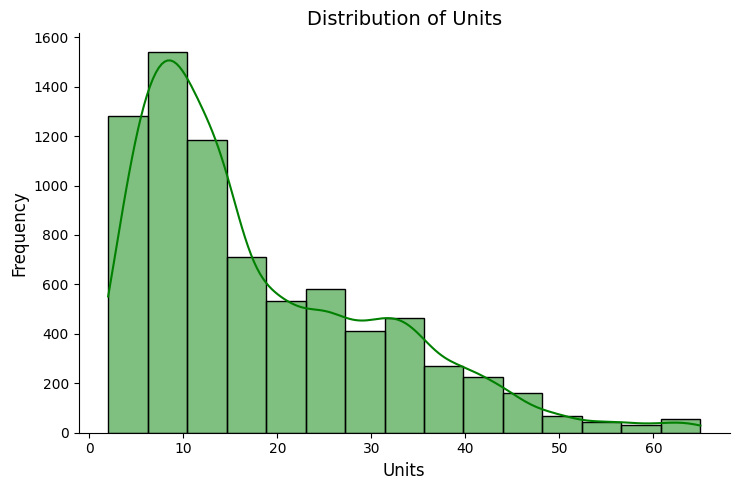

In [201]:
# Distribution plot for Unit
sns.displot(df['Unit'], kde=True, color='green', bins = 15, height=5, aspect=1.5)

# Add labels and title
plt.title("Distribution of Units", fontsize=14)
plt.xlabel("Units", fontsize=12)
plt.ylabel("Frequency", fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()